In [ ]:
# Create a dictionary to store each form ID and its writer
from google.colab import drive
import os
from itertools import islice

drive.mount("/content/gdrive",force_remount=True)
form_writer = {}
with open('/content/gdrive/MyDrive/tcs rio internship/forms.txt') as f:
  for line in islice(f, 16, None):
    line_list = line.split(' ')
    form_id = line_list[0]
    writer = line_list[1]
    form_writer[form_id] = writer

list(form_writer.items())[0:5]

Mounted at /content/gdrive


[('a01-003x', '003'),
 ('a01-007', '004'),
 ('a01-007u', '000'),
 ('a01-007x', '003'),
 ('a01-011', '005')]

In [ ]:
# Select the 50 most common writer

from collections import Counter

top_writers = []
num_writers = 50
writers_counter = Counter(form_writer.values())
for writer_id,_ in writers_counter.most_common(num_writers):
    top_writers.append(writer_id)

print(top_writers[0:5])

['000', '150', '151', '152', '153']


In [ ]:
top_forms = []
for form_id, author_id in form_writer.items():
    if author_id in top_writers:
        top_forms.append(form_id)

print(top_forms[0:5])


['a01-007u', 'a01-011u', 'a01-014u', 'a01-020u', 'a01-026u']


In [ ]:
import glob
import numpy as np

tmp = []
target_list = []

path_to_files = os.path.join('/content/gdrive/MyDrive/tcs rio internship/dataset_tcs', '*')
for filename in sorted(glob.glob(path_to_files)):
    image_name = filename.split('/')[-1]
    file, ext = os.path.splitext(image_name)
    parts = file.split('-')
    form = parts[0] + '-' + parts[1]
    if form in form_writer:
        tmp.append(filename)
        target_list.append(str(form_writer[form]))

img_files = np.array(tmp)
img_targets = np.asarray(target_list)
print(img_files[0:5])
print(img_targets[0:5])
print(img_files.shape)
print(img_targets.shape)



['/content/gdrive/MyDrive/tcs rio internship/dataset_tcs/b06-032-s00-00.png'
 '/content/gdrive/MyDrive/tcs rio internship/dataset_tcs/b06-032-s00-01.png'
 '/content/gdrive/MyDrive/tcs rio internship/dataset_tcs/b06-032-s01-00.png'
 '/content/gdrive/MyDrive/tcs rio internship/dataset_tcs/b06-032-s01-01.png'
 '/content/gdrive/MyDrive/tcs rio internship/dataset_tcs/b06-032-s01-02.png']
['130' '130' '130' '130' '130']
(123,)
(123,)


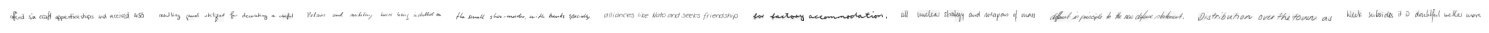

In [ ]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

def visualize_image_samples(image_dir, num_samples=10):
    image_files = os.listdir(image_dir)
    selected_files = random.sample(image_files, num_samples)

    fig, axes = plt.subplots(nrows=1, ncols=num_samples, figsize=(15, 5))

    for i, file in enumerate(selected_files):
        image_path = os.path.join(image_dir, file)
        image = Image.open(image_path)
        axes[i].imshow(image, cmap='gray')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Usage
image_directory = '/content/drive/MyDrive/tcs rio internship/dataset_tcs'
visualize_image_samples(image_directory, num_samples=10)


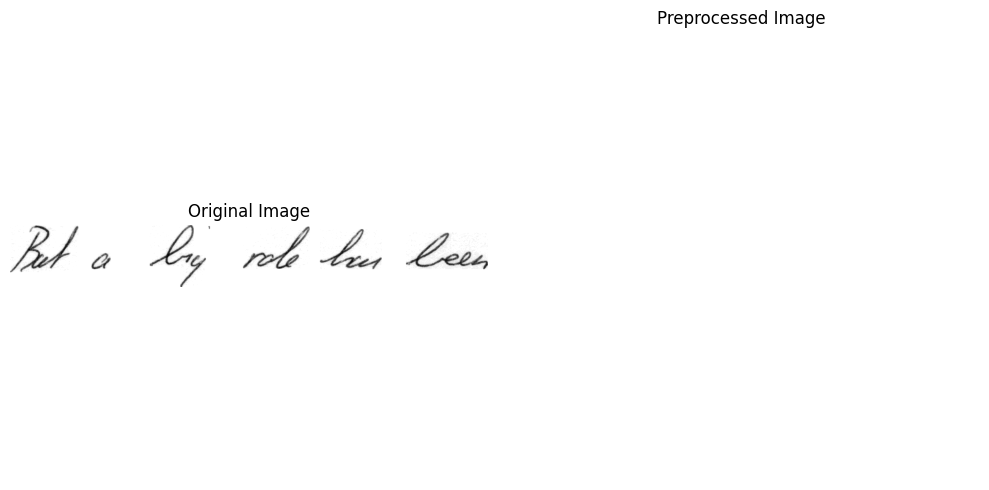

In [ ]:
def visualize_preprocessing(image_dir, image_filename):
    image_path = os.path.join(image_dir, image_filename)
    image = Image.open(image_path)


    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')


    axes[1].set_title('Preprocessed Image')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# Usage
image_directory = '/content/drive/MyDrive/tcs rio internship/dataset_tcs'
image_filename = '/content/drive/MyDrive/tcs rio internship/dataset_tcs/b06-032-s01-00.png'
visualize_preprocessing(image_directory, image_filename)


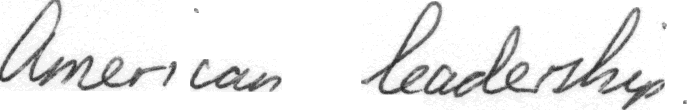

In [ ]:
from PIL import Image

def load_and_display_image(image_dir, image_filename):
    image_path = os.path.join(image_dir, image_filename)
    image = Image.open(image_path)
    image.show()

# Usage
image_directory = '/content/drive/MyDrive/tcs rio internship/dataset_tcs'
image_filename = '/content/drive/MyDrive/tcs rio internship/dataset_tcs/b06-032-s00-01.png'
load_and_display_image(image_directory, image_filename)


In [ ]:
import os

def get_image_count(image_dir):
    image_files = os.listdir(image_dir)
    return len(image_files)

# Usage
image_directory = '/content/drive/MyDrive/tcs rio internship/dataset_tcs'
image_count = get_image_count(image_directory)
print("Total number of images:", image_count)


Total number of images: 123


In [ ]:
import os

def get_image_file_list(image_dir):
    image_files = os.listdir(image_dir)
    return image_files

# Usage
image_directory = '/content/drive/MyDrive/tcs rio internship/dataset_tcs'
file_list = get_image_file_list(image_directory)
print("Image file list:", file_list)


Image file list: ['b06-032-s00-01.png', 'b06-032-s01-01.png', 'b06-042-s00-02.png', 'b06-042-s00-01.png', 'b06-032-s02-03.png', 'b06-032-s02-01.png', 'b06-032-s02-00.png', 'b06-032-s02-02.png', 'b06-032-s00-00.png', 'b06-042-s00-03.png', 'b06-042-s00-00.png', 'b06-032-s01-00.png', 'b06-032-s01-02.png', 'b06-053-s01-01.png', 'b06-053-s00-02.png', 'b06-053-s01-03.png', 'b06-042-s01-02.png', 'b06-042-s01-04.png', 'b06-053-s01-00.png', 'b06-042-s01-06.png', 'b06-053-s00-04.png', 'b06-053-s00-05.png', 'b06-042-s01-05.png', 'b06-042-s01-00.png', 'b06-053-s00-06.png', 'b06-042-s01-01.png', 'b06-053-s00-07.png', 'b06-053-s00-03.png', 'b06-053-s01-02.png', 'b06-042-s01-03.png', 'b06-053-s00-01.png', 'b06-053-s00-00.png', 'b06-087-s01-04.png', 'b06-087-s00-00.png', 'b06-087-s01-06.png', 'b06-082-s02-02.png', 'b06-093-s02-03.png', 'b06-097-s01-00.png', 'b06-087-s01-03.png', 'b06-093-s02-02.png', 'b06-093-s00-01.png', 'b06-082-s01-01.png', 'b06-087-s01-05.png', 'b06-097-s00-02.png', 'b06-110-s00-0

In [ ]:
from PIL import Image

def resize_images(image_dir, output_dir, target_size):
    image_files = os.listdir(image_dir)

    for file in image_files:
        image_path = os.path.join(image_dir, file)
        output_path = os.path.join(output_dir, file)

        image = Image.open(image_path)
        resized_image = image.resize(target_size)
        resized_image.save(output_path)

# Usage
image_directory = '/content/drive/MyDrive/tcs rio internship/dataset_tcs'
output_directory = '/content/drive/MyDrive/tcs rio internship'
target_size = (256, 256)
resize_images(image_directory, output_directory, target_size)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


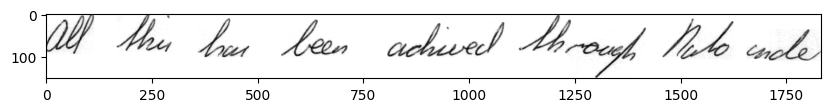

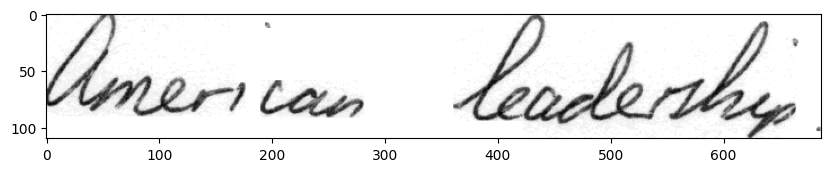

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

for file_name in img_files[:2]:
    img = mpimg.imread(file_name)
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap ='gray')

In [ ]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(img_targets)
encoded_img_targets = encoder.transform(img_targets)

print("Writer ID        : ", img_targets[:2])
print("Encoded writer ID: ", encoded_img_targets[:2])

Writer ID        :  ['130' '130']
Encoded writer ID:  [4 4]


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(img_files, encoded_img_targets, test_size=0.2, shuffle = True)

# Further split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle = True)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(78,) (20,) (25,)
(78,) (20,) (25,)


In [ ]:
CROP_SIZE = 113
NUM_LABELS = 50
BATCH_SIZE = 16

Label:  11


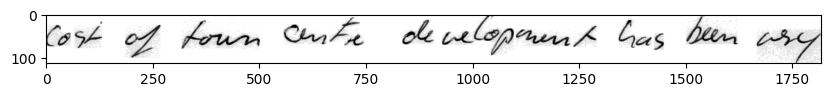

In [ ]:
#pip install pillow
from sklearn.utils import shuffle
from PIL import Image
import random

def get_augmented_sample(sample, label, sample_ratio):
    # Get current image details
    img = Image.open(sample)
    img_width = img.size[0]
    img_height = img.size[1]

    # Compute resize dimensions such that aspect ratio is maintained
    height_fac = CROP_SIZE / img_height
    size = (int(img_width * height_fac), CROP_SIZE)

    # Resize image
    new_img = img.resize((size), Image.ANTIALIAS)
    new_img_width = new_img.size[0]
    new_img_height = new_img.size[1]

    # Generate a random number of crops of size 113x113 from the resized image
    x_coord = list(range(0, new_img_width - CROP_SIZE))
    num_crops = int(len(x_coord) * sample_ratio)
    random_x_coord = random.sample(x_coord, num_crops)

    # Create augmented images (cropped forms) and map them to a label (writer)
    images = []
    labels = []
    for x in random_x_coord:
        img_crop = new_img.crop((x, 0, x + CROP_SIZE, CROP_SIZE))
        # Transform image to an array of numbers
        images.append(np.asarray(img_crop))
        labels.append(label)

    return (images, labels)


sample, label = X_train[0], y_train[0]
img = mpimg.imread(sample)
plt.figure(figsize = (10,10))
plt.imshow(img, cmap ='gray')
print("Label: ", label)

In [ ]:
images, labels = get_augmented_sample(sample, label, 0.1)
print(labels)
print("Num of labels: ", len(labels))

[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
Num of labels:  170


170


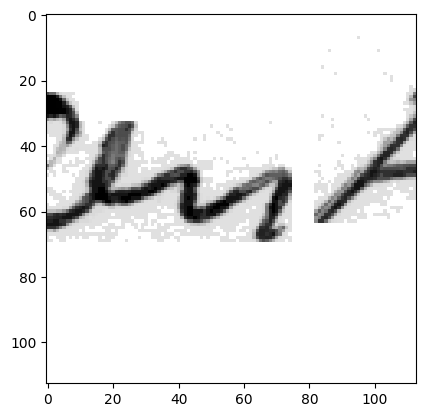

In [ ]:
print(len(images))
plt.imshow(images[0], cmap ='gray');

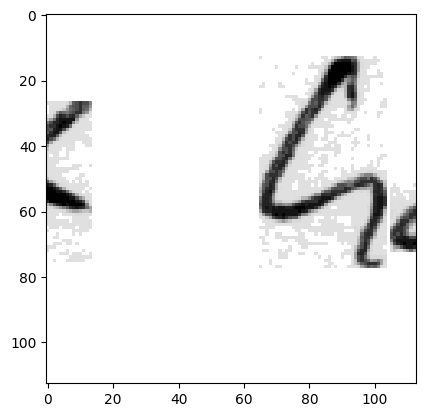

In [ ]:
plt.imshow(images[1], cmap ='gray');

In [ ]:
import operator
from functools import reduce
from keras.utils import to_categorical

def generate_data(samples, labels, batch_size, sample_ratio):
    while 1:
        for offset in range(0, len(samples), batch_size):
            batch_samples = samples[offset:(offset + batch_size)]
            batch_labels = labels[offset:(offset + batch_size)]

            # Augment each sample in batch
            augmented_batch_samples = []
            augmented_batch_labels = []
            for i in range(len(batch_samples)):
                sample = batch_samples[i]
                label = batch_labels[i]
                augmented_samples, augmented_labels = get_augmented_sample(sample, label, sample_ratio)
                augmented_batch_samples.append(augmented_samples)
                augmented_batch_labels.append(augmented_labels)

            # Flatten out samples and labels
            augmented_batch_samples = reduce(operator.add, augmented_batch_samples)
            augmented_batch_labels = reduce(operator.add, augmented_batch_labels)

            # Reshape input format
            X_train = np.array(augmented_batch_samples)
            X_train = X_train.reshape(X_train.shape[0], CROP_SIZE, CROP_SIZE, 1)

            # Transform input to float and normalize
            X_train = X_train.astype('float32')
            X_train /= 255

            # Encode y
            y_train = np.array(augmented_batch_labels)
            y_train = to_categorical(y_train, NUM_LABELS)

            yield X_train, y_train

In [ ]:
train_generator = generate_data(X_train, y_train, BATCH_SIZE, 0.3)
validation_generator = generate_data(X_val, y_val, BATCH_SIZE, 0.3)
test_generator = generate_data(X_test, y_test, BATCH_SIZE, 0.1)

In [ ]:
import tensorflow as tf

#config = tf.config.experimental
#tf.Session(config = config)
config = tf.compat.v1.ConfigProto()
tf.compat.v1.Session(config = config)

In [ ]:
def resize_image(img):
    size = round(CROP_SIZE/2)
    return tf.image.resize(img, [size, size])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, Activation
from keras.layers.convolutional import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras.optimizers import Adam
from keras import metrics

model = Sequential()

# Define network input shape
model.add(ZeroPadding2D((1, 1), input_shape=(CROP_SIZE, CROP_SIZE, 1)))
# Resize images to allow for easy computation
model.add(Lambda(resize_image))

# CNN model - Building the model suggested in paper
model.add(Convolution2D(filters= 32, kernel_size =(5,5), strides= (2, 2), padding='same', name='conv1'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool1'))

model.add(Convolution2D(filters= 64, kernel_size =(3, 3), strides= (1, 1), padding='same', name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool2'))

model.add(Convolution2D(filters= 128, kernel_size =(3, 3), strides= (1, 1), padding='same', name='conv3'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool3'))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512, name='dense1'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256, name='dense2'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(NUM_LABELS, name='output'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 115, 115, 1)      0         
 2D)                                                             
                                                                 
 lambda (Lambda)             (None, 56, 56, 1)         0         
                                                                 
 conv1 (Conv2D)              (None, 28, 28, 32)        832       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 pool1 (MaxPooling2D)        (None, 14, 14, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 64)        18496     
                                                        

In [ ]:
from keras.callbacks import ModelCheckpoint

# Create directory to save checkpoints at
model_checkpoints_path = "gdrive/My Drive/TCS RIO/model_checkpoints"
if not os.path.exists(model_checkpoints_path):
    os.makedirs(model_checkpoints_path)

# Save model after every epoch using checkpoints
create_checkpoint = ModelCheckpoint(
    filepath = "gdrive/My Drive/TCS RIO/model_checkpoints/check-{epoch:02d}-{val_loss:.4f}.hdf5",
    verbose = 1,
    save_best_only = False
)

# Fit model using generators
history_object = model.fit_generator(
    train_generator,
    steps_per_epoch = 10, #round(len(X_train) / BATCH_SIZE),
    validation_data = validation_generator,
    validation_steps = round(len(X_val) / BATCH_SIZE),
    epochs = 30,
    verbose = 1,
    callbacks = [create_checkpoint]
)

<ipython-input-19-7dc1c728cb73>:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_object = model.fit_generator(


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 3.3610 - acc: 0.0858 
Epoch 1: saving model to gdrive/My Drive/TCS RIO/model_checkpoints/check-01-2.8123.hdf5
10/10 [==============================] - 166s 17s/step - loss: 3.3610 - acc: 0.0858 - val_loss: 2.8123 - val_acc: 0.1218
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 2.8142 - acc: 0.1040 
Epoch 2: saving model to gdrive/My Drive/TCS RIO/model_checkpoints/check-02-2.6348.hdf5
10/10 [==============================] - 172s 18s/step - loss: 2.8142 - acc: 0.1040 - val_loss: 2.6348 - val_acc: 0.0080
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.6435 - acc: 0.1097 
Epoch 3: saving model to gdrive/My Drive/TCS RIO/model_checkpoints/check-03-2.6837.hdf5
10/10 [==============================] - 168s 17s/step - loss: 2.6435 - acc: 0.1097 - val_loss: 2.6837 - val_acc: 0.0000e+00
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 2.5804 - acc: 0.1175 
Epoch 4: 

In [ ]:
model_weights_path = "/content/gdrive/MyDrive/TCS RIO/model_checkpoints/check-30-1.0882.hdf5"
if model_weights_path:
    model.load_weights(model_weights_path)
    scores = model.evaluate_generator(test_generator, steps=round(len(X_test)/BATCH_SIZE))
    print("Accuracy: ", scores[1])
else:
    print("Set model weights file to load in the 'model_weights_path' variable")

FileNotFoundError: ignored

In [ ]:
# Load test data

from random import sample

images = []
for filename in X_test[:50]:
  im = Image.open(filename)
  cur_width = im.size[0]
  cur_height = im.size[1]
  # print("Before Crop: ", cur_width, cur_height)
  height_fac = CROP_SIZE / cur_height
  new_width = int(cur_width * height_fac)
  size = new_width, CROP_SIZE
  # Resize so height = 113 while keeping aspect ratio
  imresize = im.resize((size), Image.ANTIALIAS)
  now_width = imresize.size[0]
  now_height = imresize.size[1]
  # print("After Crop: ", now_width, now_height)
  # Generate crops of size 113x113 from this resized image and keep random 10% of crops

  avail_x_points = list(range(0, now_width - CROP_SIZE ))# total x start points are from 0 to width -113

  # Pick random x%
  factor = 0.1
  pick_num = int(len(avail_x_points)*factor)
  # print("Picked Number:", pick_num)

  random_startx = sample(avail_x_points,  pick_num)

  for start in random_startx:
      imcrop = imresize.crop((start, 0, start+CROP_SIZE, CROP_SIZE))
      images.append(np.asarray(imcrop))

  x_test = np.array(images)

  x_test = x_test.reshape(x_test.shape[0], CROP_SIZE, CROP_SIZE, 1)
  # convert to float and normalize
  x_test = x_test.astype('float32')
  x_test /= 255
  shuffle(x_test)

print(x_test.shape)

(3493, 113, 113, 1)


In [ ]:
# Creating the predictive model

predictions = model.predict(x_test, verbose=1)

print(predictions.shape)
predicted_writer = []
for pred in predictions:
  predicted_writer.append(np.argmax(pred))
print(len(predicted_writer))

110/110 [==============================] - 2s 20ms/step
(3493, 50)
3493


<ipython-input-23-9644a6c0796a>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(2,2))


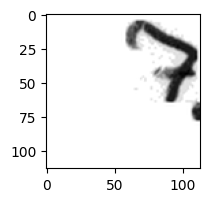

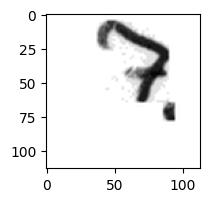

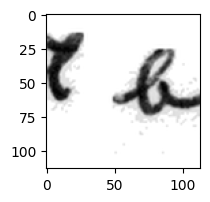

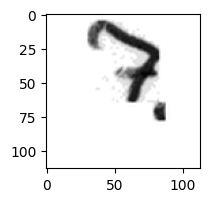

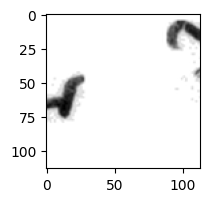

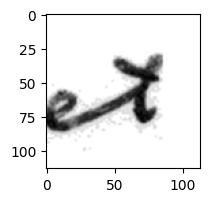

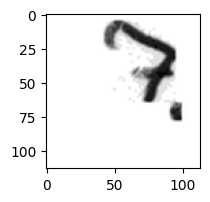

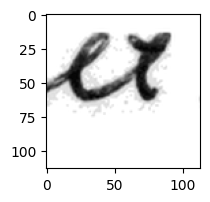

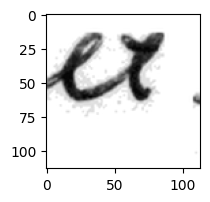

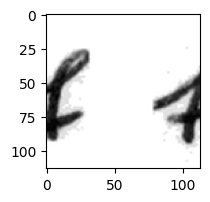

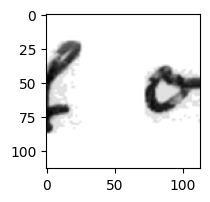

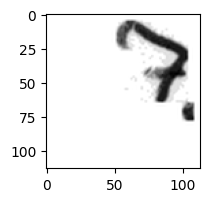

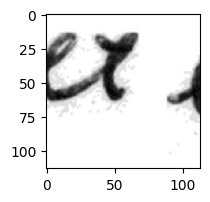

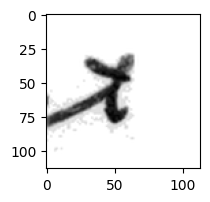

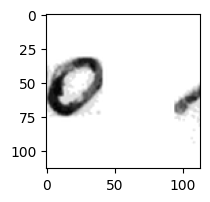

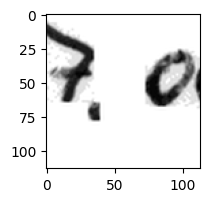

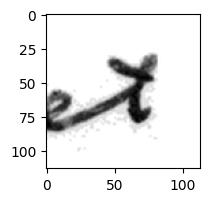

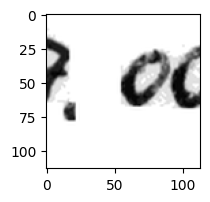

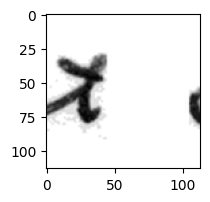

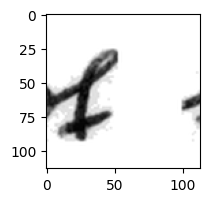

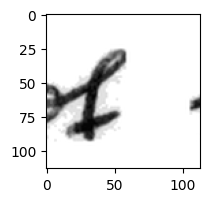

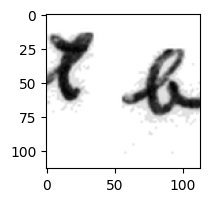

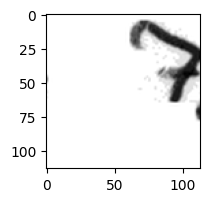

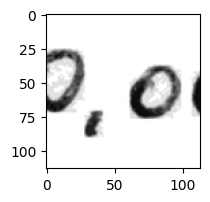

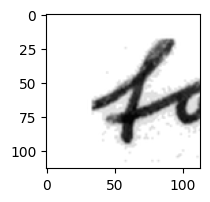

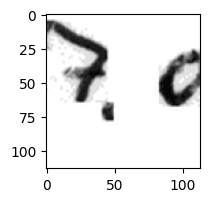

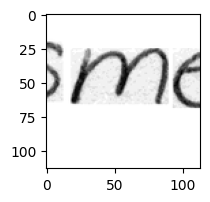

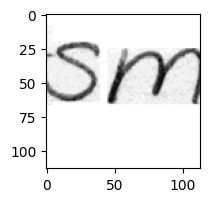

In [ ]:
# Mapping Test image with Trained image

writer_number = 0
total_images = 10
counter = 0
for i in range(len(predicted_writer)//10):
  if predicted_writer[i] == writer_number:
    image = x_test[i].squeeze()
    plt.figure(figsize=(2,2))
    plt.imshow(image, cmap ='gray')
#print(x_test[1])
image1 = x_test[0].squeeze()
image2 = x_test[1].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image1, cmap='gray');

plt.figure(figsize=(2,2))
plt.imshow(image2, cmap='gray');